# Week 9

This week, we cover decision trees for classification and regression. Decision trees are highly *interpretable* models because they create an explicit set of single-feature-based rules for making their predictions.

Decision trees are interpretable and they train very quickly, but the set of rules is sometimes too large to be helpful and they have high variance, meaning they are very sensitive to small changes to the training data. We will explore some ways to deal with these downsides as well.

# Lecture 16 - Implementing Decision Trees

We will use the following (slightly modified) tutorial from https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html.

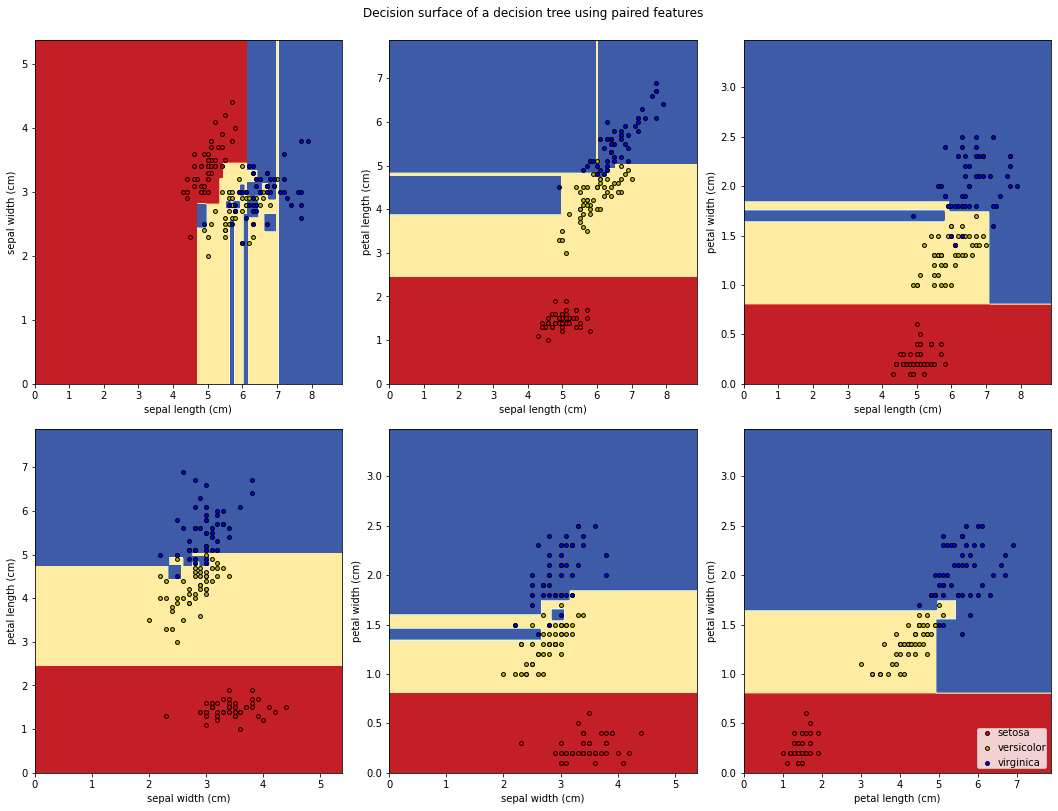

In [66]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# hyperparameters
n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02

# Load the iris dataset
iris = load_iris()

plt.figure(figsize=(16,12))

# run the model for each pair of features
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # fit the classifier
    clf = DecisionTreeClassifier().fit(X, y)

    # plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    # predict the testing data on a tight mesh of points in space and color-code them
    x_min, x_max = 0, X[:, 0].max() + 1
    y_min, y_max = 0, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))

    plt.tight_layout(h_pad=1, w_pad=1, pad=5)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i], cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle('Decision surface of a decision tree using paired features')
plt.legend(loc='lower right', borderpad=0, handletextpad=0)

[Text(0.5, 0.9166666666666666, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(0.5769230769230769, 0.75, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(0.3076923076923077, 0.5833333333333334, 'petal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(0.15384615384615385, 0.4166666666666667, 'petal width (cm) <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.46153846153846156, 0.4166666666666667, 'petal width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(0.38461538

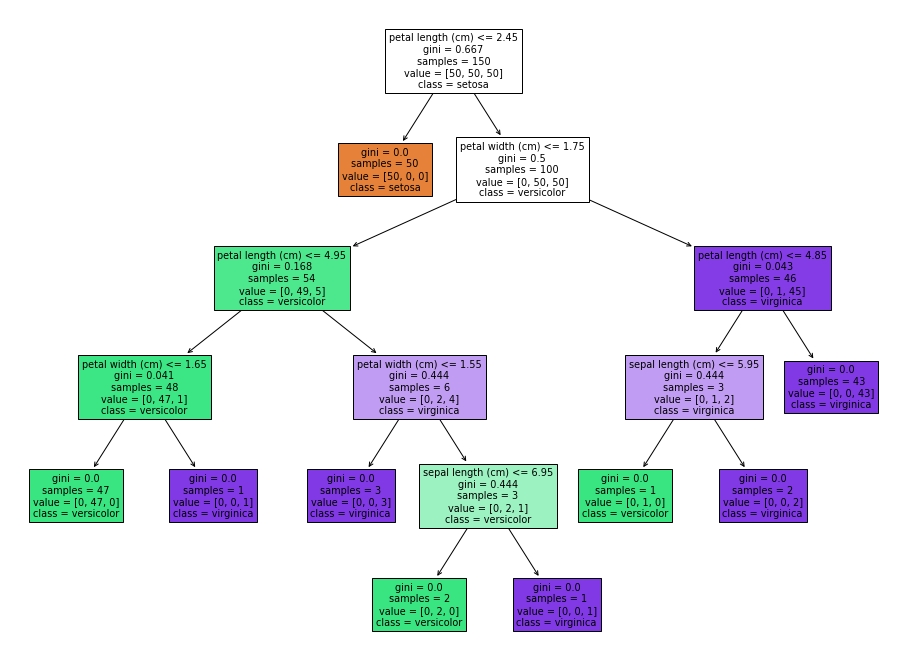

In [46]:
# plot a tree fit to the whole dataset
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plt.figure(figsize=(16,12))
plot_tree(clf, filled=True, feature_names = iris.feature_names, class_names = iris.target_names)

## Cost-complexity Pruning

We will use some ideas from the `scikit-learn` documentation at https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html.

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

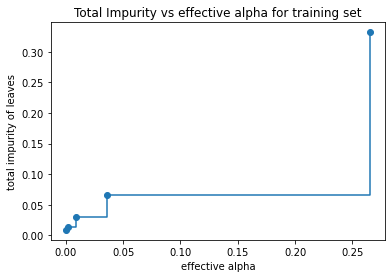

In [18]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# create the classifier
clf = DecisionTreeClassifier(random_state=0)

# do cost-complexity pruning
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# plotting the impurities for different alphas
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

Next, we train a decision tree using the effective alphas. The last value in `ccp_alphas` is the alpha value that prunes the whole tree, leaving the tree, `clfs[-1]`, with one node.

In [3]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.332795493197279


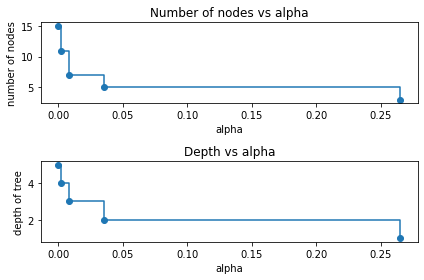

In [4]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

For the remainder of this example, we remove the last element in `clfs` and `ccp_alphas`, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

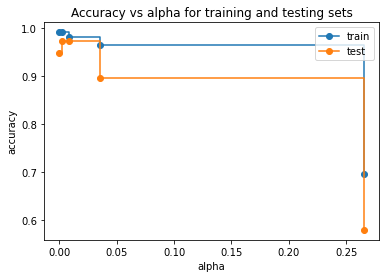

In [5]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

When `ccp_alpha` is set to zero and keeping the other default parameters of DecisionTreeClassifier, the tree overfits, leading to a 100% training accuracy and 88% testing accuracy. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, setting `ccp_alpha = 0.015` maximizes the testing accuracy.

### Regression Trees

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree

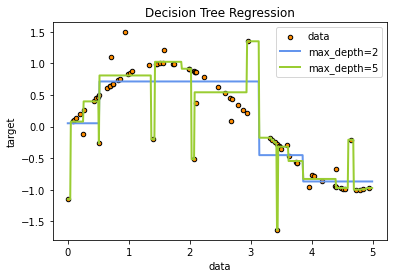

In [2]:
# code from https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

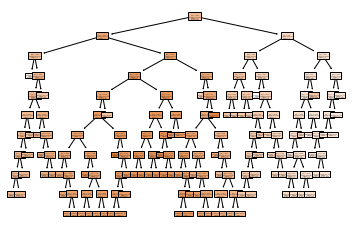

In [3]:
clf = DecisionTreeRegressor().fit(X, y)
plot_tree(clf, filled=True)
plt.show()

In [4]:
diabetes = load_diabetes()

In [5]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [6]:
# read the data and target
X = diabetes['data']
y = diabetes['target']

# split the data into train and test sets
trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.25, random_state = 1)

# create the model
model = DecisionTreeRegressor()

# fit the model to thet training data
model.fit(trainX, trainY)

# predict the outputs for training data
trainPredictions = model.predict(trainX)

# predict the outputs for training data
testPredictions = model.predict(testX)

# compute the training and test mean absolute error
trainError = mean_absolute_error(trainY, trainPredictions)
testError = mean_absolute_error(testY, testPredictions)
    
# return quality metrics
print('The r^2 score is', r2_score(trainY, trainPredictions))
print('The mean absolute error on the training set is', trainError)
print('The mean absolute error on the testing set is', testError)

The r^2 score is 1.0
The mean absolute error on the training set is 0.0
The mean absolute error on the testing set is 61.828828828828826


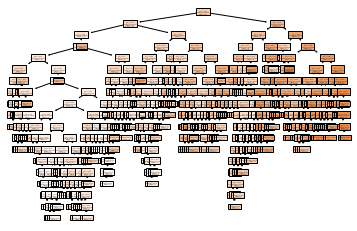

In [9]:
model = DecisionTreeRegressor().fit(trainX, trainY)
plot_tree(model, filled=True)
plt.show()

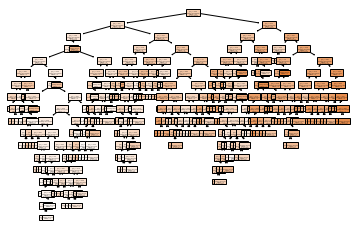

The r^2 score is 0.9974314171106199
The mean absolute error on the training set is 2.7361530715005036
The mean absolute error on the testing set is 62.96861861861861


In [ ]:
model = DecisionTreeRegressor(ccp_alpha = 0.).fit(trainX, trainY)
plot_tree(model, filled=True)
plt.show()

# predict the outputs for training data
trainPredictions = model.predict(trainX)

# predict the outputs for training data
testPredictions = model.predict(testX)

# compute the training and test mean absolute error
trainError = mean_absolute_error(trainY, trainPredictions)
testError = mean_absolute_error(testY, testPredictions)
    
# return quality metrics
print('The r^2 score is', r2_score(trainY, trainPredictions))
print('The mean absolute error on the training set is', trainError)
print('The mean absolute error on the testing set is', testError)